## Time Series Analysis

In [1]:
# importing necessary libraries
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
#Reading the timeseries data
df = pd.read_csv('Training timeseries.csv')
df.head()

,Date,Sales Beat 81 SKU 95,Sales Beat 98 SKU 95
0,8/1/2015,137,98
1,8/2/2015,160,65
2,8/3/2015,147,60
3,8/4/2015,191,60
4,8/5/2015,171,59


In [3]:
# check for null values in data
df.isnull().sum()

Date                    0
Sales Beat 81 SKU 95    0
Sales Beat 98 SKU 95    0
dtype: int64

In [4]:
# Set date into proper datetime format
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date                    datetime64[ns]
Sales Beat 81 SKU 95             int64
Sales Beat 98 SKU 95             int64
dtype: object

In [5]:
# Indexing Dates
df = df.set_index('Date')
df.index

DatetimeIndex(['2015-08-01', '2015-08-02', '2015-08-03', '2015-08-04',
               '2015-08-05', '2015-08-06', '2015-08-07', '2015-08-08',
               '2015-08-09', '2015-08-10', '2015-08-11', '2015-08-12',
               '2015-08-13', '2015-08-14', '2015-08-15', '2015-08-16',
               '2015-08-17', '2015-08-18', '2015-08-19', '2015-08-20',
               '2015-08-21', '2015-08-22', '2015-08-23', '2015-08-24',
               '2015-08-25', '2015-08-26', '2015-08-27', '2015-08-28',
               '2015-08-29', '2015-08-30', '2015-08-31', '2015-09-01',
               '2015-09-02', '2015-09-03', '2015-09-04', '2015-09-05',
               '2015-09-06', '2015-09-07', '2015-09-08', '2015-09-09',
               '2015-09-10', '2015-09-11', '2015-09-12', '2015-09-13',
               '2015-09-14', '2015-09-15', '2015-09-16', '2015-09-17',
               '2015-09-18', '2015-09-19', '2015-09-20', '2015-09-21',
               '2015-09-22', '2015-09-23', '2015-09-24', '2015-09-25',
      

In [6]:
#Resample our data into weekly segements
df_columns = ['Sales Beat 81 SKU 95', 'Sales Beat 98 SKU 95']
df_weekly_mean = df[df_columns].resample('W').mean() # W stands for weekly
df_weekly_mean

,Sales Beat 81 SKU 95,Sales Beat 98 SKU 95
Date,,
2015-08-02,148.500000,81.500000
2015-08-09,173.000000,60.857143
2015-08-16,156.142857,55.571429
2015-08-23,161.428571,66.857143
2015-08-30,157.142857,60.428571
2015-09-06,151.428571,66.857143
2015-09-13,173.714286,64.857143
2015-09-20,158.714286,70.857143
2015-09-27,165.285714,69.714286


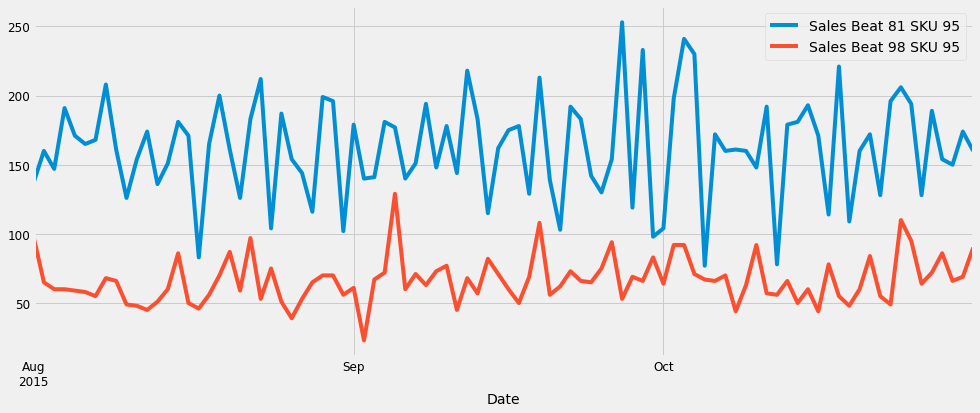

In [7]:
# Visualizing the variables for a finding trends in data
df.plot(figsize=(15, 6))
plt.show()

#### It can be observed that both sales features have some relational commonality between them.

In [8]:
df_81 = df['Sales Beat 81 SKU 95']

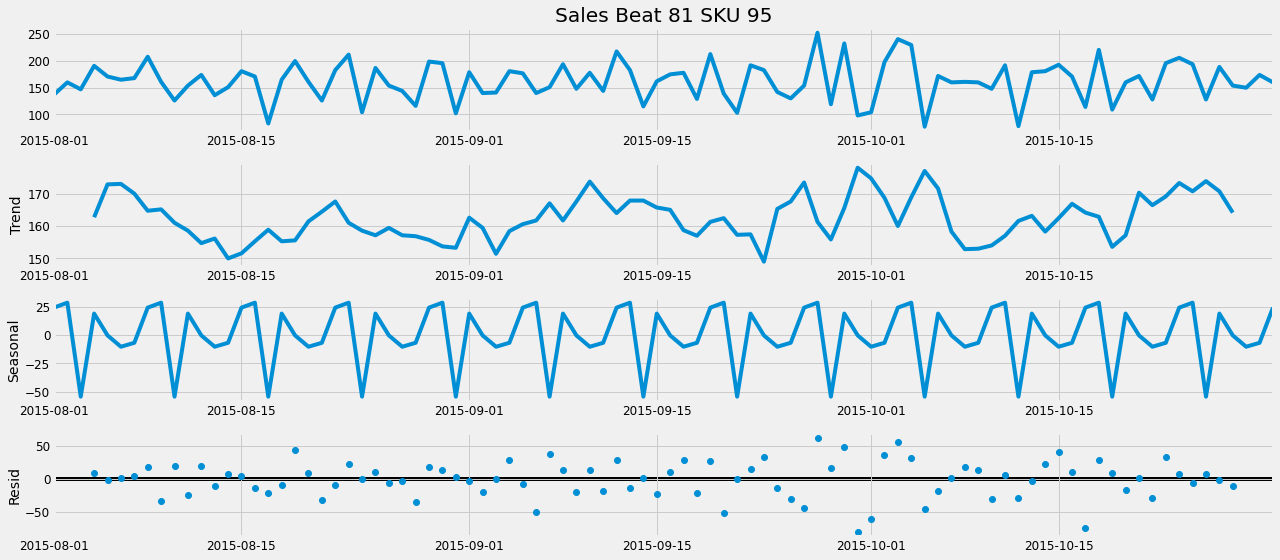

In [9]:
# using pylab to find the trend, seasonality and Residual for Sales beat 81
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df_81, model='additive')
fig = decomposition.plot()
plt.show()

#### It can be observed that the trend is repeated after every 2 week. Making similar highs and lows between those weeks. The cyclic seasonal graph confirms it.

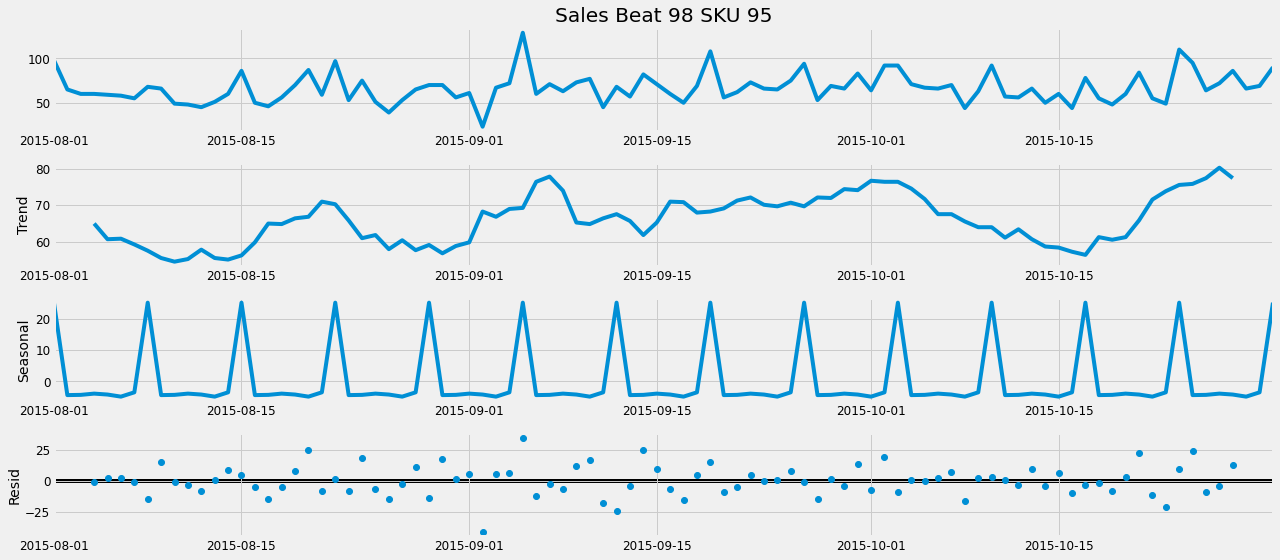

In [10]:
# using pylab to find the trend, seasonality and Residual for Sales beat 98
df_98 = df['Sales Beat 98 SKU 95']
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df_98, model='additive')
fig = decomposition.plot()
plt.show()

#### It can be observed that the trend is repeated after every 2 week. The seasonal cycle is also very clear for the sales beat 98.

## Forecast for Sales Beat 81 SKU 95

In [11]:
# We are using Arima Model for fitting the data and future forecasting
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [12]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
            mod = sm.tsa.statespace.SARIMAX(df_81,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
results = mod.fit()
print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was 

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was 

ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:685.6041797137996


In [13]:
mod = sm.tsa.statespace.SARIMAX(df_81,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1476      0.154     -0.959      0.338      -0.449       0.154
ma.L1         -1.0000    933.891     -0.001      0.999   -1831.393    1829.393
ar.S.L12      -0.6043      0.118     -5.116      0.000      -0.836      -0.373
sigma2      1915.6360   1.79e+06      0.001      0.999    -3.5e+06    3.51e+06


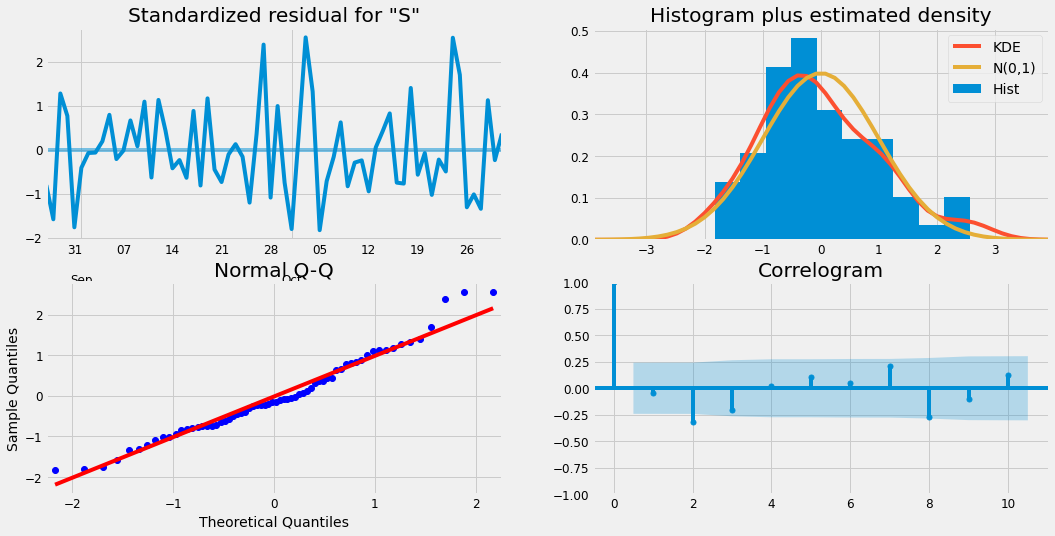

In [14]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

#### Density distribution of data shows a normal distribution of data also the sample quantiles and theoratical quantiles are in a linear relationship shows the good model fitting 

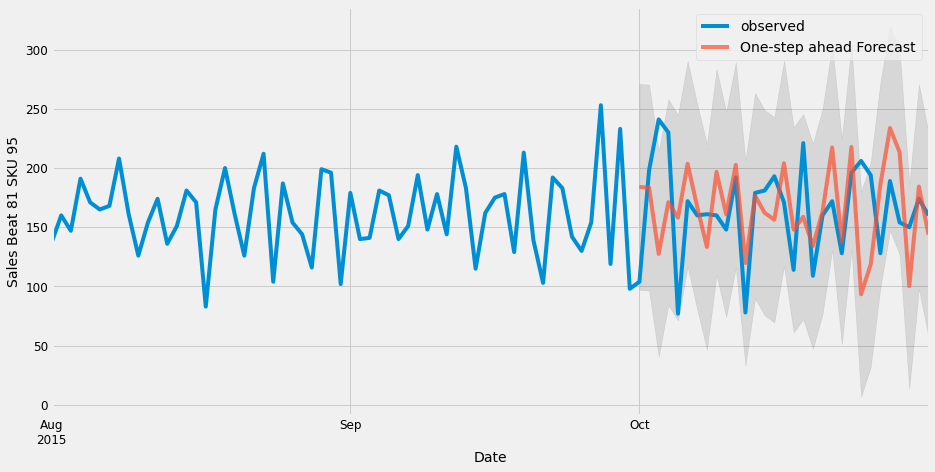

In [15]:
pred = results.get_prediction(start=pd.to_datetime('2015-10-1'), dynamic=False)
pred_ci = pred.conf_int()
ax = df_81['2015':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.1)
ax.set_xlabel('Date')
ax.set_ylabel('Sales Beat 81 SKU 95')
plt.legend()
plt.show()

#### The prediction graph shows a good relationship between the predicted and observed sales value. Similar highs and lows are observed

In [16]:
df_81_forecasted = pred.predicted_mean
df_81_truth = df_81['2015-08-01':]
mse = ((df_81_forecasted - df_81_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2445.29


In [17]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 49.45


#### RMSE of 49 is a good representative of the model given the sales variablity

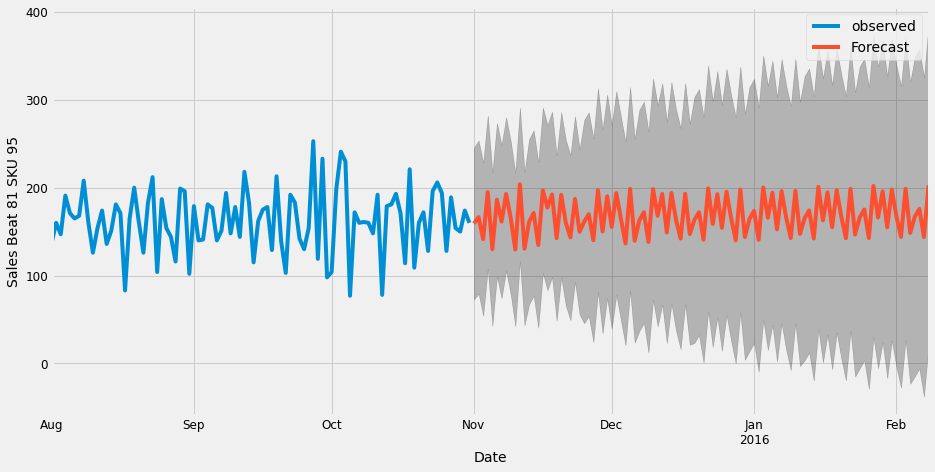

In [18]:
#Forecasting the model for future values.
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = df_81.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales Beat 81 SKU 95')
plt.legend()
plt.show()

## Forecast for Sales Beat 98 SKU 95

In [19]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [20]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
            mod = sm.tsa.statespace.SARIMAX(df_98,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
results = mod.fit()
print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was 

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was 

ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:585.6017129531705


In [21]:
mod1 = sm.tsa.statespace.SARIMAX(df_98,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results1 = mod1.fit()
print(results1.summary().tables[1])

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0970      0.175      0.555      0.579      -0.245       0.439
ma.L1         -1.0000    456.110     -0.002      0.998    -894.959     892.959
ar.S.L12      -0.4747      0.105     -4.534      0.000      -0.680      -0.269
sigma2       544.0297   2.48e+05      0.002      0.998   -4.86e+05    4.87e+05


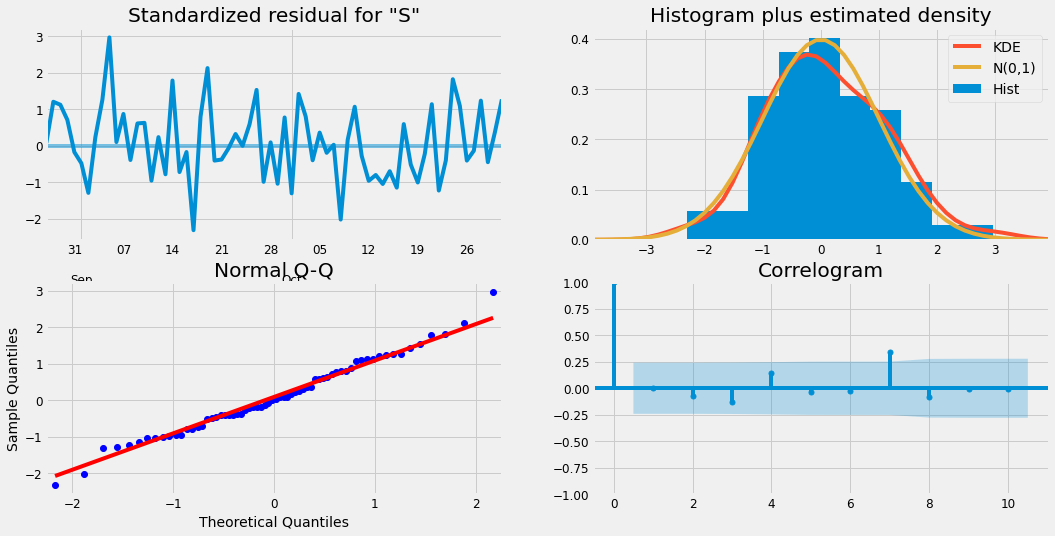

In [22]:
results1.plot_diagnostics(figsize=(16, 8))
plt.show()

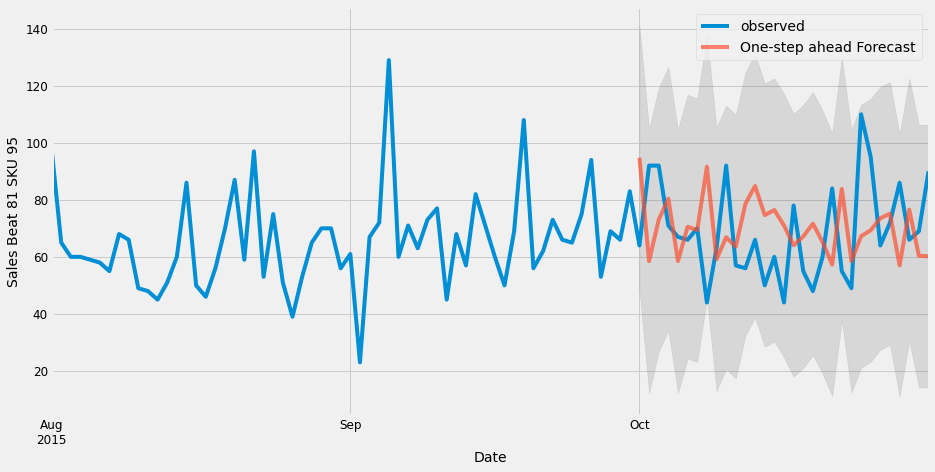

In [25]:
pred1 = results1.get_prediction(start=pd.to_datetime('2015-10-1'), dynamic=False)
pred_ci1 = pred1.conf_int()
ax = df_98['2015':].plot(label='observed')
pred1.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci1.index,
                pred_ci1.iloc[:, 0],
                pred_ci1.iloc[:, 1], color='k', alpha=.1)
ax.set_xlabel('Date')
ax.set_ylabel('Sales Beat 81 SKU 95')
plt.legend()
plt.show()

In [26]:
df_98_forecasted = pred1.predicted_mean
df_98_truth = df_98['2015-08-01':]
mse1 = ((df_98_forecasted - df_98_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2445.29


In [27]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse1), 2)))

The Root Mean Squared Error of our forecasts is 22.07


#### RMSE of 22 shows even better fitting of model for the Sales beat 98

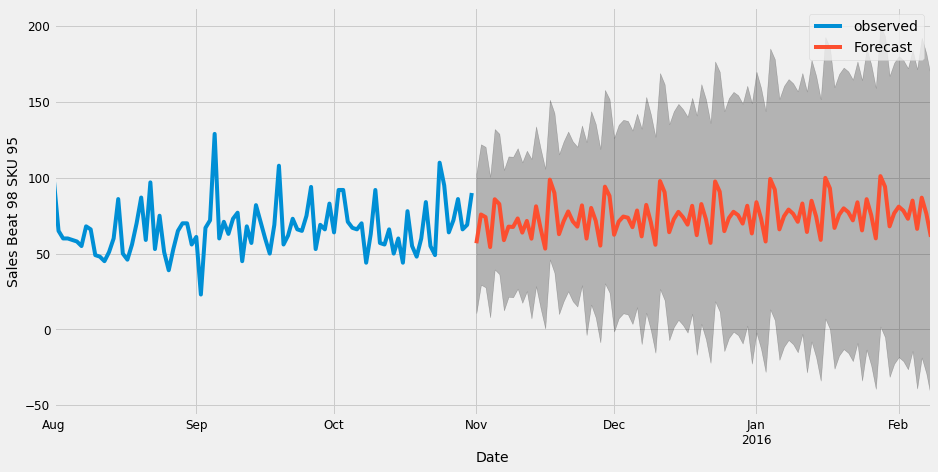

In [28]:
# Forecast for Sales Beat 98
pred_uc1 = results1.get_forecast(steps=100)
pred_ci1 = pred_uc1.conf_int()
ax = df_98.plot(label='observed', figsize=(14, 7))
pred_uc1.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci1.index,
                pred_ci1.iloc[:, 0],
                pred_ci1.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales Beat 98 SKU 95')
plt.legend()
plt.show()